# 20장 실험 데이터 이해하기

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/python4daml/blob/main/20장.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
import matplotlib.pyplot as plt

#선 두께
plt.rcParams['lines.linewidth'] = 4
#제목 폰트 크기
plt.rcParams['axes.titlesize'] = 16
#축 레이블 폰트 크기
plt.rcParams['axes.labelsize'] = 16
#x 축 텍스트 크기
plt.rcParams['xtick.labelsize'] = 16
#y 축 텍스트 크기
plt.rcParams['ytick.labelsize'] = 16
#x 축 눈금 크기
plt.rcParams['xtick.major.size'] = 7
#y 축 눈금 크기
plt.rcParams['ytick.major.size'] = 7
#마커 크기
plt.rcParams['lines.markersize'] = 10
#범례를 표시할 때 마커 표시 개수
plt.rcParams['legend.numpoints'] = 1
#범례 텍스트 크기
plt.rcParams['legend.fontsize'] = 14

# 한글 폰트 사용을 위한 코드입니다.
import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib 

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 코랩의 경우 깃허브에서 데이터를 다운로드합니다.
if 'google.colab' in sys.modules:
    import gdown
    gdown.download('https://raw.githubusercontent.com/rickiepark/python4daml/main/launcherData.csv', quiet=False)
    gdown.download('https://raw.githubusercontent.com/rickiepark/python4daml/main/springData.csv', quiet=False)

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


Downloading...
From: https://raw.githubusercontent.com/rickiepark/python4daml/main/launcherData.csv
To: /content/launcherData.csv
392B [00:00, 454kB/s]                    
Downloading...
From: https://raw.githubusercontent.com/rickiepark/python4daml/main/springData.csv
To: /content/springData.csv
240B [00:00, 528kB/s]                    


## 스프링 운동

예제 20-1 파일에서 데이터 읽어 오기

In [2]:
def get_data(input_file):
    with open(input_file, 'r') as data_file:
        distances = []
        masses = []
        data_file.readline() #ignore header
        for line in data_file:
            d, m = line.split(',')
            distances.append(float(d))
            masses.append(float(m))
    return (masses, distances)

예제 20-2 그래프 그리기

그림 20-2 스프링의 변위

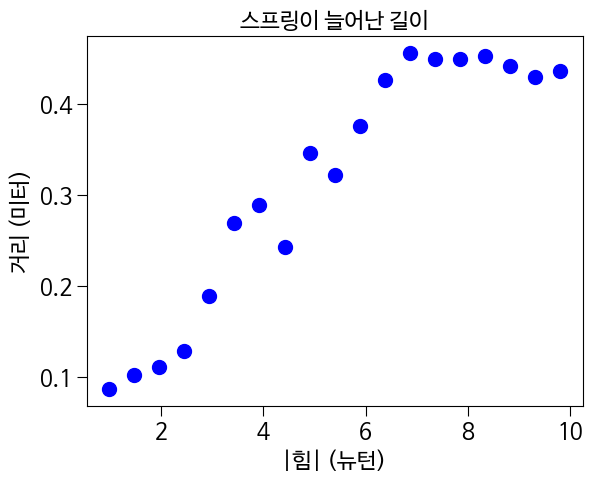

In [3]:
import numpy as np

def plot_data(input_file):
    masses, distances = get_data(input_file)
    distances = np.array(distances)
    masses = np.array(masses)
    forces = masses*9.81
    plt.plot(forces, distances, 'bo',
             label = '측정 길이')
    plt.title('스프링이 늘어난 길이')
    plt.xlabel('|힘| (뉴턴)')
    plt.ylabel('거리 (미터)')

plot_data('springData.csv')

### 20.1.1 선형 회귀를 사용해 최적의 직선 찾기

예제 20-3 데이터에 가장 잘 맞는 곡선 찾기

In [4]:
def fit_data(input_file):
    masses, distances = get_data(input_file)
    distances = np.array(distances)
    forces = np.array(masses)*9.81
    plt.plot(forces, distances, 'bo',
             label = '측정 길이')
    plt.title('스프링이 늘어난 길이')
    plt.xlabel('|힘| (뉴턴)')
    plt.ylabel('거리 (미터)')
    #선형 회귀 계수 찾기
    a,b = np.polyfit(forces, distances, 1)
    predicted_distances = a*np.array(forces) + b
    k = 1.0/a # 책 설명 참고
    plt.plot(forces, predicted_distances,
             label = f'선형 회귀, k = {k:.4f}')
    plt.legend(loc = 'best')

그림 20-3 측정 데이터와 선형 모델

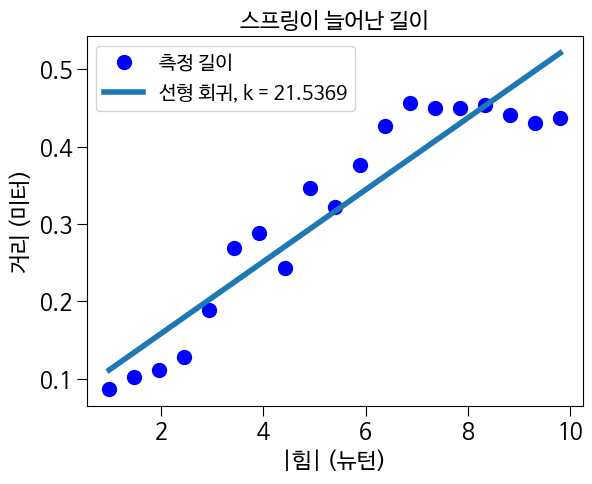

In [5]:
fit_data('springData.csv')

In [6]:
def fit_data(input_file):
    masses, distances = get_data(input_file)
    distances = np.array(distances)
    forces = np.array(masses)*9.81
    plt.plot(forces, distances, 'bo',
             label = '측정 길이')
    plt.title('스프링이 늘어난 길이')
    plt.xlabel('|힘| (뉴턴)')
    plt.ylabel('거리 (미터)')
    #선형 회귀 계수 찾기
    a,b = np.polyfit(forces, distances, 1)
    predicted_distances = a*np.array(forces) + b
    k = 1.0/a #책 설명 참고
    plt.plot(forces, predicted_distances,
             label = f'선형 회귀, k = {k:.4f}')
    #3차 다항식 계수 찾기
    fit = np.polyfit(forces, distances, 3)
    predicted_distances = np.polyval(fit, forces)
    plt.plot(forces, predicted_distances, 'k:', label = '3차 다항 회귀')
    plt.legend(loc = 'best')

그림 20-4 선형 직선과 3차 다항 곡선

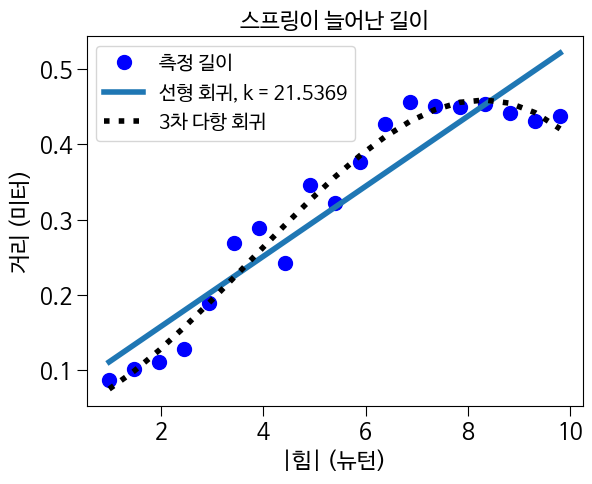

In [7]:
fit_data('springData.csv')

**뇌풀기 문제**

그림 20-5 모델을 사용해 예측하기

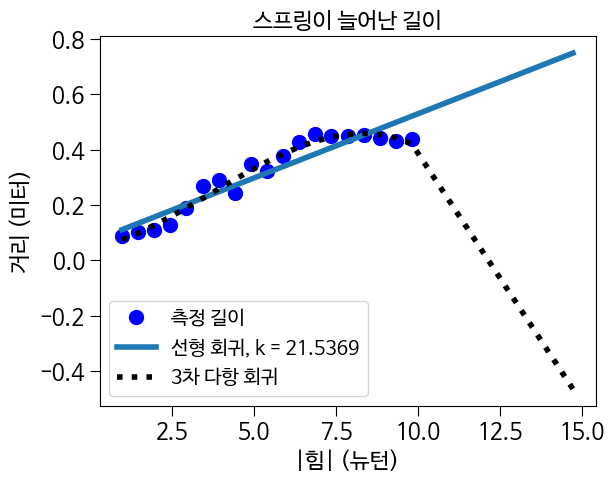

In [8]:
def fit_data(input_file):
    masses, distances = get_data(input_file)
    distances = np.array(distances)
    forces = np.array(masses)*9.81
    plt.plot(forces, distances, 'bo',
             label = '측정 길이')
    plt.title('스프링이 늘어난 길이')
    plt.xlabel('|힘| (뉴턴)')
    plt.ylabel('거리 (미터)')
    #선형 회귀 계수 찾기
    a,b = np.polyfit(forces, distances, 1)
    forces_new = np.concatenate((forces, [1.5 * 9.81]))
    predicted_distances = a*forces_new + b
    k = 1.0/a #책 설명 참고
    plt.plot(forces_new, predicted_distances,
             label = f'선형 회귀, k = {k:.4f}')
    # #3차 다항식 계수 찾기
    fit = np.polyfit(forces, distances, 3)
    predicted_distances = np.polyval(fit, forces_new)
    plt.plot(forces_new, predicted_distances, 'k:', label = '3차 다항 회귀')
    plt.legend(loc = 'best')

fit_data('springData.csv')

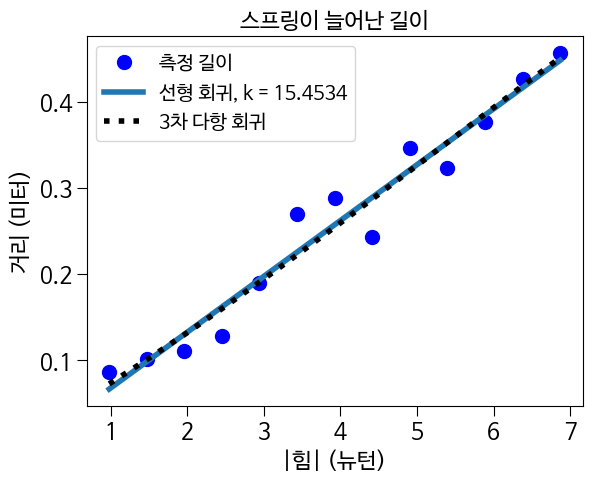

In [9]:
def fit_data(input_file):
    masses, distances = get_data(input_file)
    distances = np.array(distances[:-6])
    masses = np.array(masses[:-6])
    forces = np.array(masses)*9.81
    plt.plot(forces, distances, 'bo',
             label = '측정 길이')
    plt.title('스프링이 늘어난 길이')
    plt.xlabel('|힘| (뉴턴)')
    plt.ylabel('거리 (미터)')
    #선형 회귀 계수 찾기
    a,b = np.polyfit(forces, distances, 1)
    predicted_distances = a*np.array(forces) + b
    k = 1.0/a #책 설명 참고
    plt.plot(forces, predicted_distances,
             label = f'선형 회귀, k = {k:.4f}')
    #3차 다항식 계수 찾기
    fit = np.polyfit(forces, distances, 3)
    predicted_distances = np.polyval(fit, forces)
    plt.plot(forces, predicted_distances, 'k:', label = '3차 다항 회귀')
    plt.legend(loc = 'best')

fit_data('springData.csv')

## 20.2 발사체 운동

예제 20-5 발사체 궤적 출력하기

그림 20-7 궤적 그래프

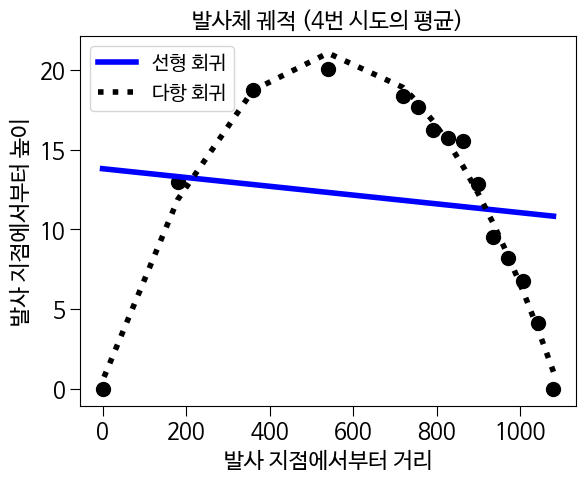

In [10]:
def get_trajectory_data(file_name):
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    with open(file_name, 'r') as data_file:
        data_file.readline()
        for line in data_file:
            d, h1, h2, h3, h4 = line.split(',')
            distances.append(float(d))
            heights1.append(float(h1))
            heights2.append(float(h2))
            heights3.append(float(h3))
            heights4.append(float(h4))
    return (distances, [heights1, heights2, heights3, heights4])

def process_trajectories(file_name):
    distances, heights = get_trajectory_data(file_name)
    num_trials = len(heights)
    distances = np.array(distances)
    #거리마다 평균 높이를 담은 배열 만들기
    tot_heights = np.array([0]*len(distances))
    for h in heights:
        tot_heights = tot_heights + np.array(h)
    mean_heights = tot_heights/len(heights)
    plt.title('발사체 궤적 ('\
              + str(num_trials) + '번 시도의 평균)')
    plt.xlabel('발사 지점에서부터 거리')
    plt.ylabel('발사 지점에서부터 높이')
    plt.plot(distances, mean_heights, 'ko')
    fit = np.polyfit(distances, mean_heights, 1)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'b', label = '선형 회귀')
    fit = np.polyfit(distances, mean_heights, 2)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'k:', label = '다항 회귀')
    plt.legend()

process_trajectories('launcherData.csv')

### 20.2.1 결정 계수

예제 20-6 R2 계산하기

In [11]:
def r_squared(measured, predicted):
    """measured는 측정 값을 담은 1차원 배열이고
       predicted는 예측 값을 담은 1차원 배열이라고 가정합니다.
       결정 계수를 반환합니다"""
    estimated_error = ((predicted - measured)**2).sum()
    mean_of_measured = measured.sum()/len(measured)
    variability = ((measured - mean_of_measured)**2).sum()
    return 1 - estimated_error/variability

선형 직선의 r**2 = 0.0177433205440769
2차 다항 곡선의 r**2 = 0.9857653692869693


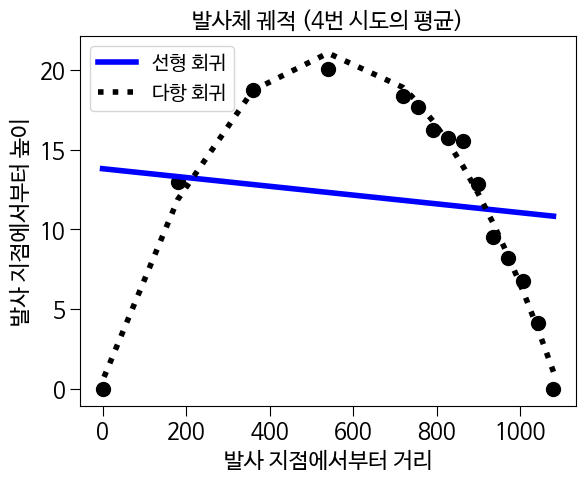

In [12]:
def process_trajectories(file_name):
    distances, heights = get_trajectory_data(file_name)
    num_trials = len(heights)
    distances = np.array(distances)
    #거리마다 평균 높이를 담은 배열 만들기
    tot_heights = np.array([0]*len(distances))
    for h in heights:
        tot_heights = tot_heights + np.array(h)
    mean_heights = tot_heights/len(heights)
    plt.title('발사체 궤적 ('\
              + str(num_trials) + '번 시도의 평균)')
    plt.xlabel('발사 지점에서부터 거리')
    plt.ylabel('발사 지점에서부터 높이')
    plt.plot(distances, mean_heights, 'ko')
    fit = np.polyfit(distances, mean_heights, 1)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'b', label = '선형 회귀')
    print('선형 직선의 r**2 =', r_squared(mean_heights, altitudes))
    fit = np.polyfit(distances, mean_heights, 2)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'k:', label = '다항 회귀')
    print('2차 다항 곡선의 r**2 =', r_squared(mean_heights, altitudes))
    plt.legend()

process_trajectories('launcherData.csv')

### 20.2.2 계산 모델 사용하기

예제 20-7 발사체의 수평 속도 계산하기

In [13]:
def get_horizontal_speed(quad_fit, min_x, max_x):
    """quad_fit는 2차 다항식의 계수이고, min_x와 max_x는 인치 단위 거리라고 가정합니다.
       초당 피트 단위로 수평 속도를 반환합니다"""
    inches_per_foot = 12
    x_mid = (max_x -min_x)/2
    a,b,c = quad_fit[0], quad_fit[1], quad_fit[2]
    y_peak = a*x_mid**2 + b*x_mid + c
    g = 32.16*inches_per_foot #중력 가속도(inches/sec/sec)
    t = (2*y_peak/g)**0.5 #정점에서 타깃까지 시간(초)
    print('수평 속도 =',
          int(x_mid/(t*inches_per_foot)), 'feet/sec')

선형 직선의 r**2 = 0.0177433205440769
2차 다항 곡선의 r**2 = 0.9857653692869693
수평 속도 = 136 feet/sec


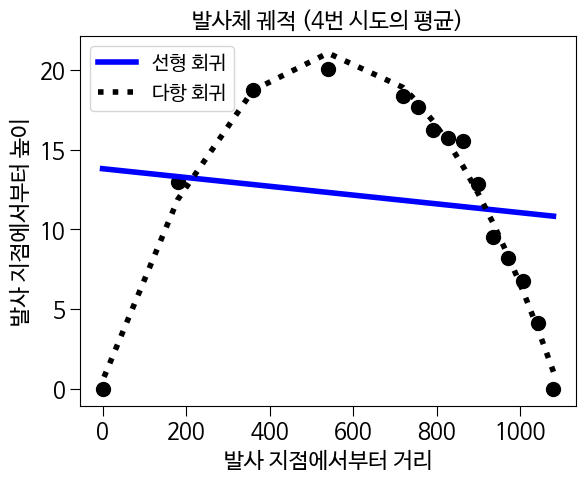

In [14]:
def process_trajectories(file_name):
    distances, heights = get_trajectory_data(file_name)
    num_trials = len(heights)
    distances = np.array(distances)
    #거리마다 평균 높이를 담은 배열 만들기
    tot_heights = np.array([0]*len(distances))
    for h in heights:
        tot_heights = tot_heights + np.array(h)
    mean_heights = tot_heights/len(heights)
    plt.title('발사체 궤적 ('\
              + str(num_trials) + '번 시도의 평균)')
    plt.xlabel('발사 지점에서부터 거리')
    plt.ylabel('발사 지점에서부터 높이')
    plt.plot(distances, mean_heights, 'ko')
    fit = np.polyfit(distances, mean_heights, 1)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'b', label = '선형 회귀')
    print('선형 직선의 r**2 =', r_squared(mean_heights, altitudes))
    fit = np.polyfit(distances, mean_heights, 2)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'k:', label = '다항 회귀')
    print('2차 다항 곡선의 r**2 =', r_squared(mean_heights, altitudes))
    plt.legend()
    get_horizontal_speed(fit, distances[-1], distances[0])

process_trajectories('launcherData.csv')

**뇌풀기 문제**

In [15]:
def find_gravity(t, v):
    """t는 시간, v는 속도를 담은 넘파이 배열이라 가정합니다.
       중력 가속도(g), 초기 속도(v0), R2 점수를 반환합니다"""
    # v = gt + v0
    g, v0 = np.polyfit(t, v, 1)
    predict_v = g*t + v0
    return g, v0, r_squared(v, predict_v)

t = np.arange(1, 6)
v = np.array([4, 6, 8, 10, 12])
print(find_gravity(t, v))

(2.0, 1.999999999999998, 1.0)


## 20.3 지수적으로 분포된 데이터 다루기

예제 20-8 지수적으로 분포된 데이터에 다항 곡선 맞추기

그림 20-8 지수적인 분포에 모델 맞추기

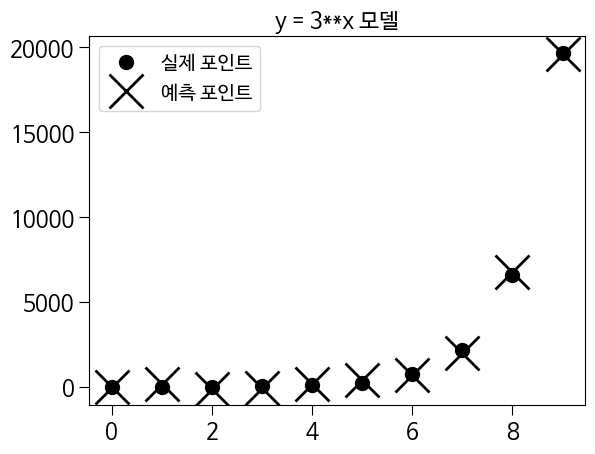

In [16]:
vals = []
for i in range(10):
    vals.append(3**i)
plt.plot(vals,'ko', label = '실제 포인트')
xVals = np.arange(10)
fit = np.polyfit(xVals, vals, 5)
y_vals = np.polyval(fit, xVals)
plt.plot(y_vals, 'kx', label = '예측 포인트',
         markeredgewidth = 2, markersize = 25)
plt.title('y = 3**x 모델')
plt.legend(loc = 'upper left')
plt.show()

In [17]:
print('3**20에 대한 모델의 예측은 약', np.polyval(fit, [3**20])[0])
print('실제 3**20 값은', 3**20)

3**20에 대한 모델의 예측은 약 2.4547827637212674e+48
실제 3**20 값은 3486784401


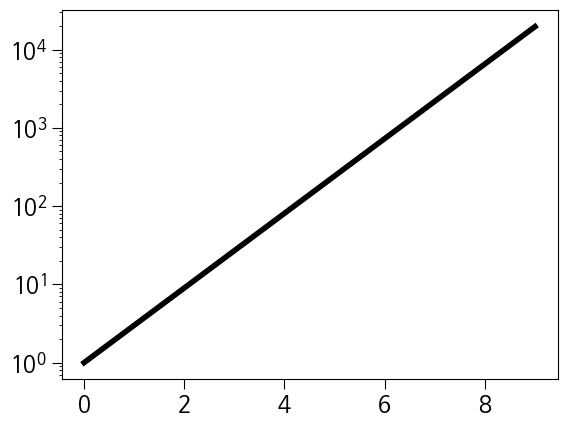

In [18]:
x_vals, y_vals = [], []
for i in range(10):
    x_vals.append(i)
    y_vals.append(3**i)
plt.plot(x_vals, y_vals, 'k')
plt.semilogy()
plt.show()

예제 20-9 `polyfit`을 사용해 지수 분포에 맞는 곡선 찾기

In [19]:
import math

def create_data(f, x_vals):
    """f는 한 개의 인수를 가진 함수이고, x_vals은 f의 인수를 담은 배열이라고 가정합니다.
       x_vals에 f를 적용한 결과를 담은 배열을 반환합니다"""
    y_vals = []
    for i in x_vals:
        y_vals.append(f(x_vals[i]))
    return np.array(y_vals)

def fit_exp_data(x_vals, y_vals):
    """x_vals과 y_vals은 y_vals[i] == f(x_vals[i])를 만족하는 숫자 배열이고,
       f는 지수 함수라고 가정합니다.
       log(f(x), base) == ax + b인 a, b, base를 반환합니다"""
    log_vals = []
    for y in y_vals:
        log_vals.append(math.log(y, 2)) #밑이 2인 로그 값 추가
    fit = np.polyfit(x_vals, log_vals, 1)
    return fit, 2

그림 20-10 지수 함수를 위한 모델

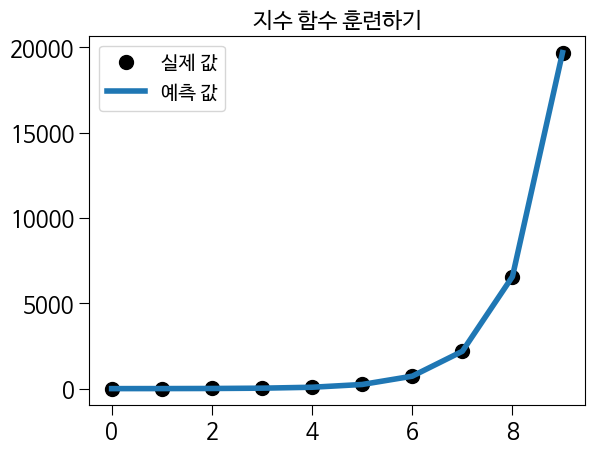

f(20) = 3486784401
예측 값 = 3486784401


In [20]:
x_vals = range(10)
f = lambda x: 3**x
y_vals = create_data(f, x_vals)
plt.plot(x_vals, y_vals, 'ko', label = '실제 값')
fit, base = fit_exp_data(x_vals, y_vals)
predictedy_vals = []
for x in x_vals:
    predictedy_vals.append(base**np.polyval(fit, x))
plt.plot(x_vals, predictedy_vals, label = '예측 값')
plt.title('지수 함수 훈련하기')
plt.legend(loc = 'upper left')
plt.show()
#원본 데이터에 없는 x 값 조사하기
print('f(20) =', f(20))
print('예측 값 =', int(base**(np.polyval(fit, [20]))))

f(20) = 3486784421
예측 값 = 2734037145


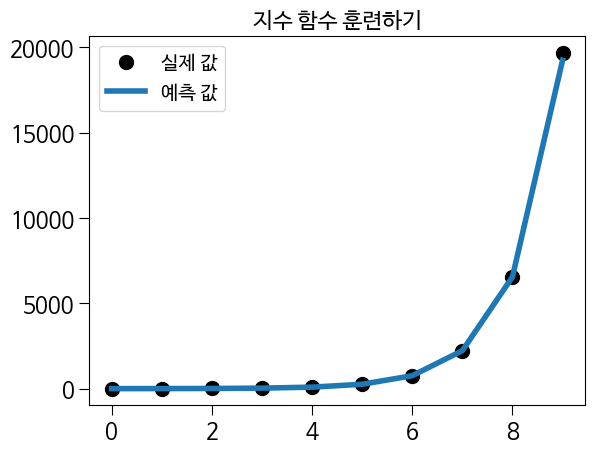

In [21]:
x_vals = range(10)
f = lambda x: 3**x + x
y_vals = create_data(f, x_vals)
plt.plot(x_vals, y_vals, 'ko', label = '실제 값')
fit, base = fit_exp_data(x_vals, y_vals)
predictedy_vals = []
for x in x_vals:
    predictedy_vals.append(base**np.polyval(fit, x))
plt.plot(x_vals, predictedy_vals, label = '예측 값')
plt.title('지수 함수 훈련하기')
plt.legend(loc = 'upper left')
plt.show()
#원본 데이터에 없는 x 값 조사하기
print('f(20) =', f(20))
print('예측 값 =', int(base**(np.polyval(fit, [20]))))